# **<center>Введение в высшую математику. Урок 5.</center><hr>**

## **<center>Элементы теории вероятностей</center>**

#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np

In [2]:
num = int(np.random.uniform(0, 37))
if num == 0:
    print('Выпал ноль')
elif num in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
    print(f'Выпало число {num} краное')
else:
    print(f'Выпало число {num} черное')

Выпало число 32 краное


#### 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Дополним код в задаче выше счетчиком, который будет подсчитывать количество раз, сколько выпало черное число, красное или же ноль.

In [3]:
red, black, zero = 0, 0, 0
n = 1000
for _ in range(n):
    num = int(np.random.uniform(0, 37))
    if num == 0:
    #     print('Выпал ноль')
        zero += 1
    elif num in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
    #     print(f'Выпало число {num} краное')
        red += 1
    else:
    #     print(f'Выпало число {num} черное')
        black += 1

In [4]:
print(f'Красное поле выпало {red} раз, черное {black} раз и ноль выпал {zero} раз')

Красное поле выпало 472 раз, черное 505 раз и ноль выпал 23 раз


Данные события являются несовместными, т.к. за одну итерацию может выпасть только одно число. Поэтому мы можем применить теорему сложения вероятнотей для всех трех исходов. Каждую из вероятностей можно найти как отношение благоприятных исходов для конкретной группы, деленное на общее количество итераций.

In [5]:
chance_red = red / n
chance_black = black / n
chance_zero = zero / n

Сумма всех вероятностей должна быть равна нулю.

In [6]:
chance_red + chance_black + chance_zero

1.0

#### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [7]:
import matplotlib.pyplot as plt

In [8]:
n = [[int(np.random.uniform(1, 11)) for _ in range(100000)] for _ in range(10)]
new_n = []

Text(0, 0.5, 'Распределение')

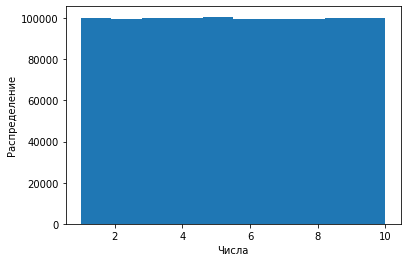

In [9]:
plt.hist(n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8]+n[9])
plt.xlabel('Числа')
plt.ylabel('Распределение')

#### 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.


In [10]:
from math import factorial as fact

In [11]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)

3740 10000 0.374


In [12]:
c = fact(4) / (fact(2) * fact(4 - 2))

Подставим все числа в формулу Бернулли.

In [13]:
print(f'Вероятность 2-х успехов из 4-х равна {c / 2 ** 4}')

Вероятность 2-х успехов из 4-х равна 0.375


#### 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Три из четырех:

In [14]:
c = fact(4) / (fact(3) * fact(4 - 3))

In [15]:
print(f'Вероятность 2-х успехов из 4-х равна {c / 2 ** 4}')

Вероятность 2-х успехов из 4-х равна 0.25


Три из пяти:

In [16]:
c = fact(5) / (fact(3) * fact(5 - 3))

In [17]:
print(f'Вероятность 2-х успехов из 4-х равна {c / 2 ** 5}')

Вероятность 2-х успехов из 4-х равна 0.3125


#### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.

In [18]:
import itertools

In [19]:
for p in itertools.permutations("01234",2):
    print(''.join(str(x) for x in p))

01
02
03
04
10
12
13
14
20
21
23
24
30
31
32
34
40
41
42
43


In [20]:
for p in itertools.permutations("01234",4):
    print(''.join(str(x) for x in p))

0123
0124
0132
0134
0142
0143
0213
0214
0231
0234
0241
0243
0312
0314
0321
0324
0341
0342
0412
0413
0421
0423
0431
0432
1023
1024
1032
1034
1042
1043
1203
1204
1230
1234
1240
1243
1302
1304
1320
1324
1340
1342
1402
1403
1420
1423
1430
1432
2013
2014
2031
2034
2041
2043
2103
2104
2130
2134
2140
2143
2301
2304
2310
2314
2340
2341
2401
2403
2410
2413
2430
2431
3012
3014
3021
3024
3041
3042
3102
3104
3120
3124
3140
3142
3201
3204
3210
3214
3240
3241
3401
3402
3410
3412
3420
3421
4012
4013
4021
4023
4031
4032
4102
4103
4120
4123
4130
4132
4201
4203
4210
4213
4230
4231
4301
4302
4310
4312
4320
4321


In [21]:
for p in itertools.combinations("01234",4):
    print(''.join(str(x) for x in p))

0123
0124
0134
0234
1234


#### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

In [22]:
from IPython.display import Latex
import warnings
warnings.filterwarnings('ignore')

$R = \frac{\sum(x_i - x_m)(y_i - y_m)}{\sqrt{\sum(x_i - x_m)^2\sum(y_i - y_m)^2}}$

0.7052434569240076 0.16058632956062496
0.7052434569240074 0.16058632956062496


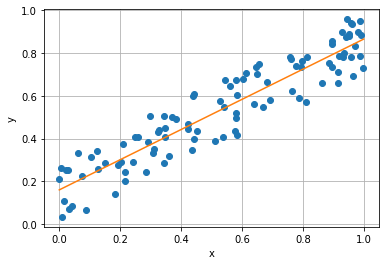

In [23]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [24]:
avgx = np.sum(x) / n
avgy = np.sum(y) / n
corr = np.sum((x - avgx) * (y - avgy)) / np.sqrt(np.sum((x - avgx) ** 2) * np.sum((y - avgy) ** 2))
corr

0.9311064319283457